C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_38672\186752379.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette='viridis')


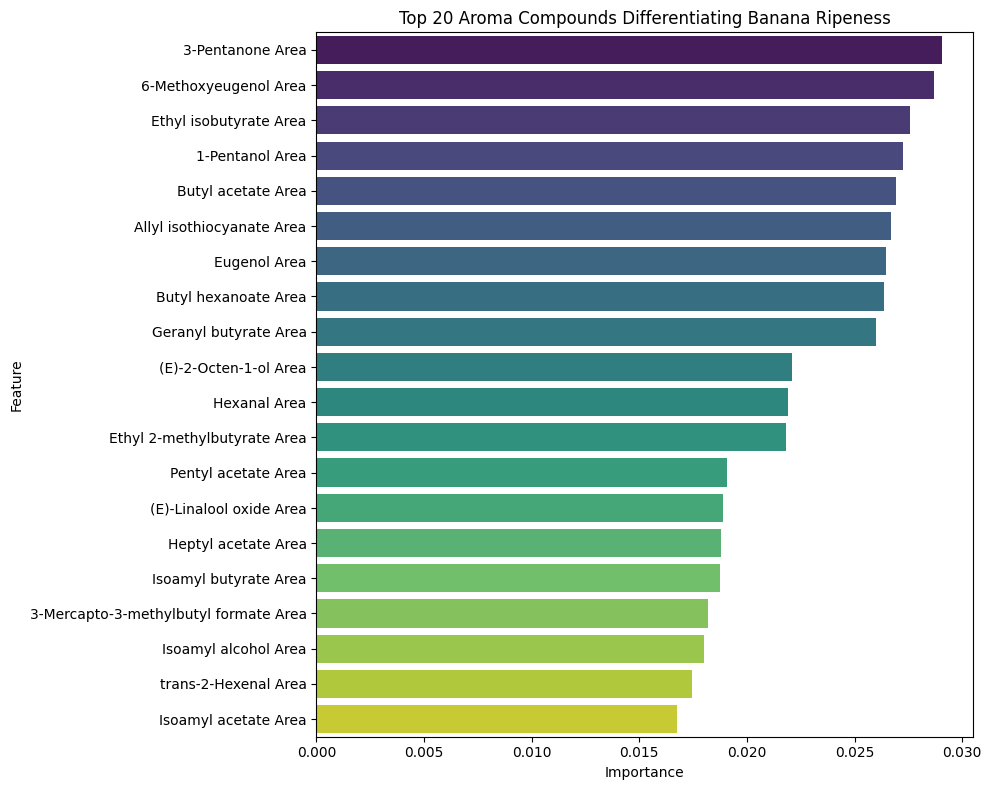

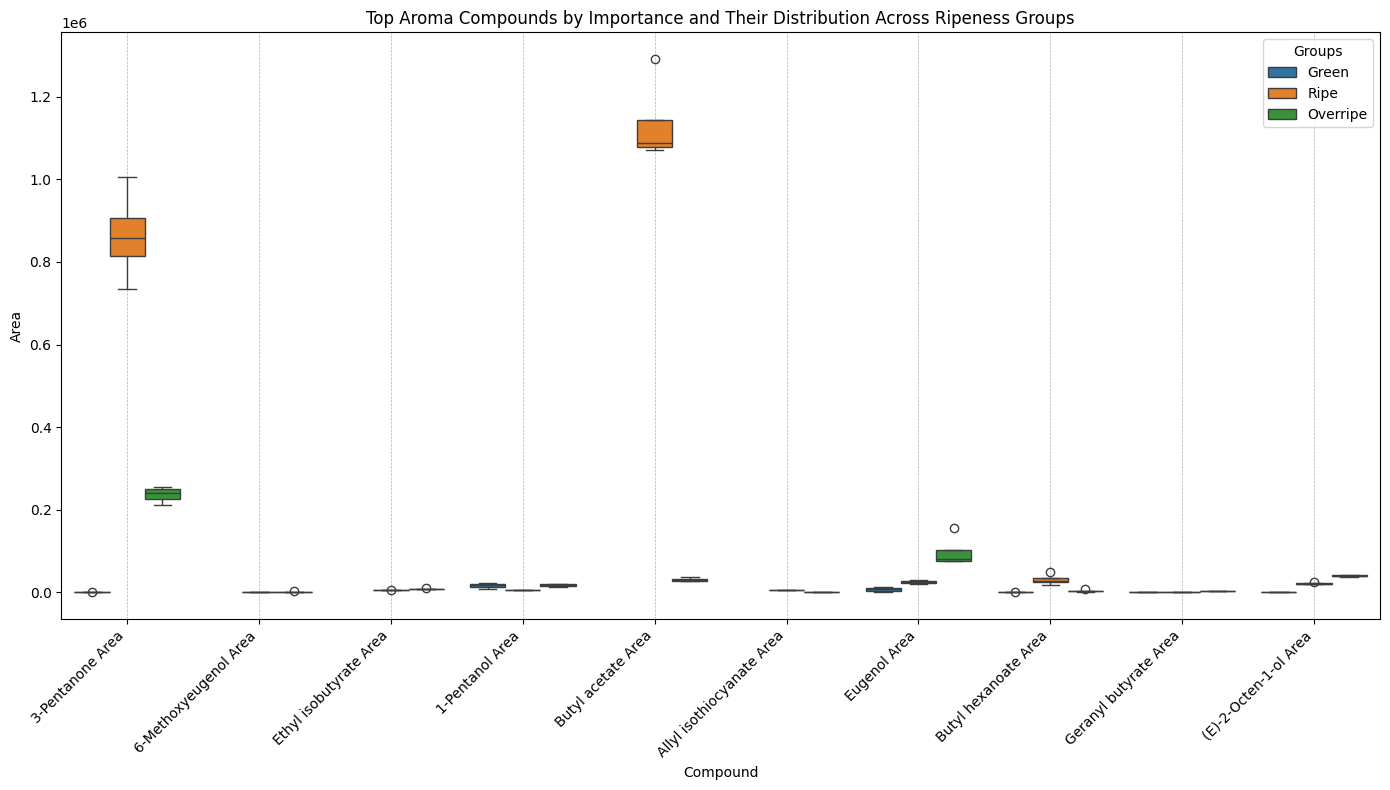

SHAP summary for class Green


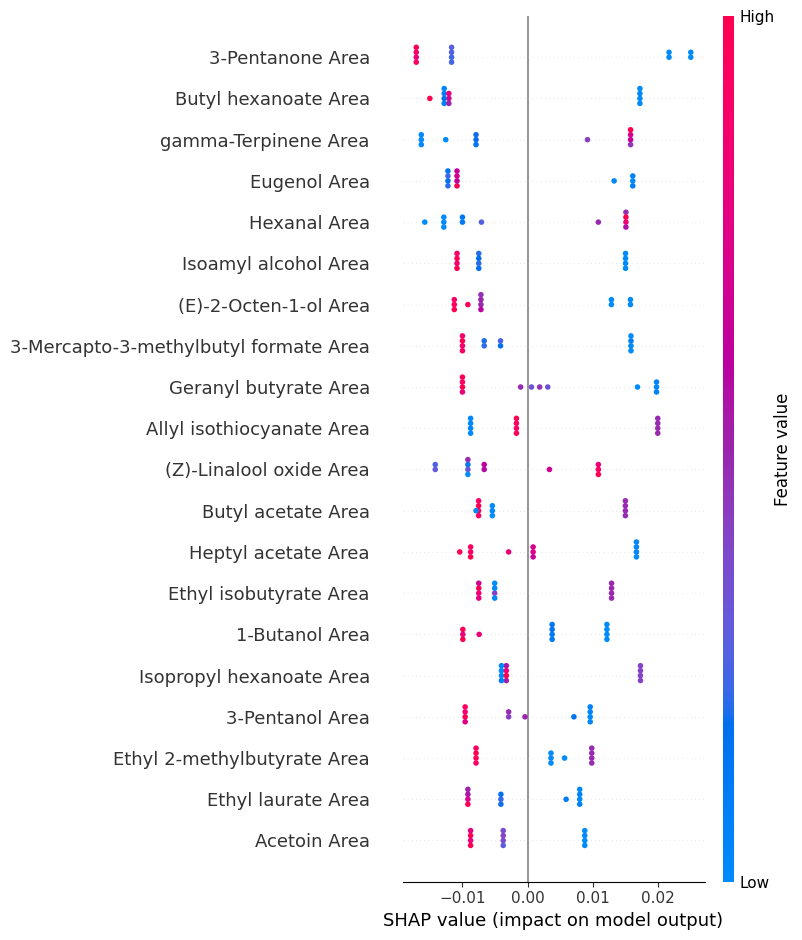

SHAP summary for class Overripe


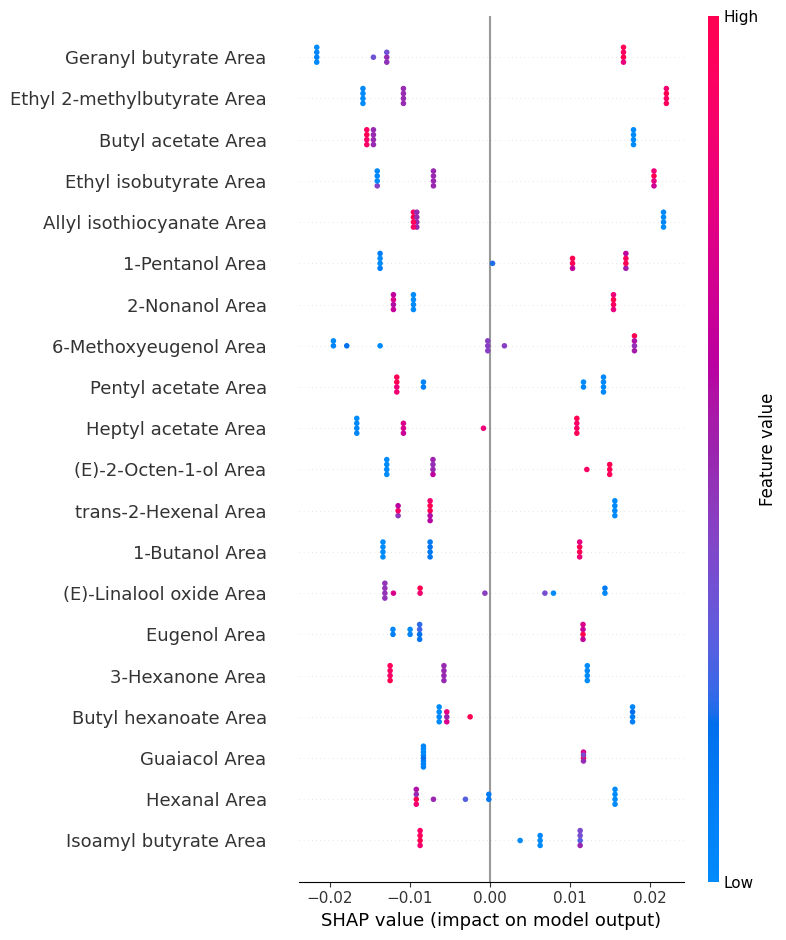

SHAP summary for class Ripe


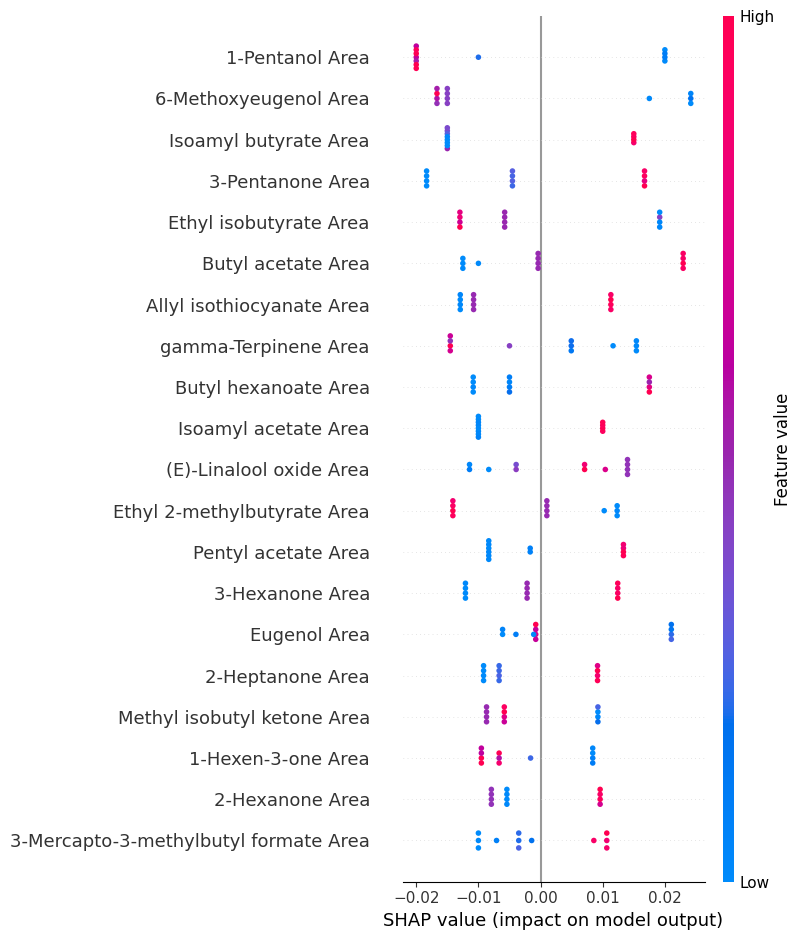

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

import shap
# Load the dataset
df = pd.read_csv("badata.csv")

# Drop the first unnamed column if it's an index or irrelevant
df = df.drop(columns=[df.columns[0]])

# Separate features and target
target = df['Groups']
features = df.drop(columns=['Groups'])

# Encode the target labels
le = LabelEncoder()
y = le.fit_transform(target)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(features)

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
feature_names = features.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot top 20 important features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette='viridis')
plt.title('Top 20 Aroma Compounds Differentiating Banana Ripeness')
plt.tight_layout()
plt.savefig("top_aroma_markers.png")
plt.show()

# Select top 10 important features
top_features = importance_df.head(10)['Feature'].values

# Prepare data for visualization
df_top = df[['Groups'] + list(top_features)]
df_melted = df_top.melt(id_vars='Groups', var_name='Compound', value_name='Area')

# Plot the distribution of top features across banana ripeness groups
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_melted, x='Compound', y='Area', hue='Groups')
plt.xticks(rotation=45, ha='right')
plt.title('Top Aroma Compounds by Importance and Their Distribution Across Ripeness Groups')
plt.tight_layout()
plt.grid(axis='x', linestyle= '--', linewidth=0.5)
plt.savefig("top_compound_distributions.png")
plt.show()

explainer = shap.TreeExplainer(rf)

X_df = pd.DataFrame(X, columns=features.columns)

shap_values = explainer.shap_values(X)


# Summary plot for all classes
for class_idx, class_name in enumerate(le.classes_):
    print(f"SHAP summary for class {class_name}")
    # select shap values for that class (samples, features)
    shap_class = shap_values[:, :, class_idx]
    shap.summary_plot(shap_class, X_df)

C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_38672\3367428648.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_features, rotation=45, ha='right')


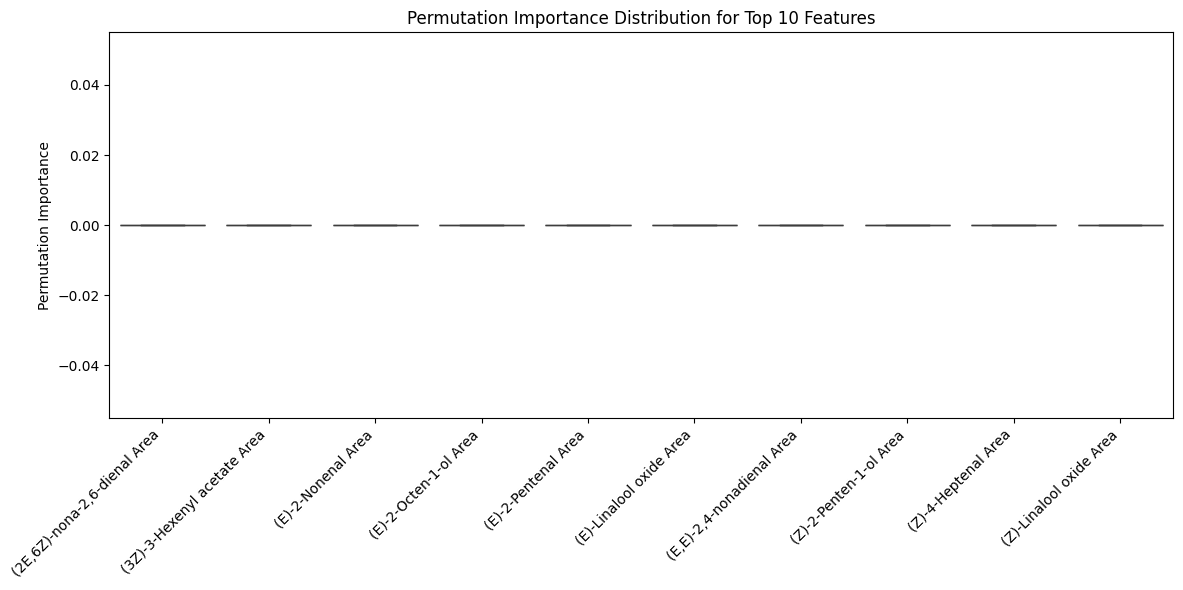

In [3]:

from sklearn.inspection import permutation_importance

result = permutation_importance(rf, X, y, n_repeats=10, random_state=42)
importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)


# Plot the distribution of importances across permutations for top 10 features
top_features = importance_df.head(10)['Feature'].values
fig, ax = plt.subplots(figsize=(12, 6))

# Plot boxplots of permutation importances
box_data = [result.importances[i] for i in np.argsort(result.importances_mean)[-10:][::-1]]
sns.boxplot(data=box_data)
ax.set_xticklabels(top_features, rotation=45, ha='right')
ax.set_ylabel("Permutation Importance")
ax.set_title("Permutation Importance Distribution for Top 10 Features")
plt.tight_layout()
plt.savefig("permutation_importance_distribution.png")
plt.show()


This version drops columns with more than 50% missing values.


C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_38672\4134392259.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette='viridis')


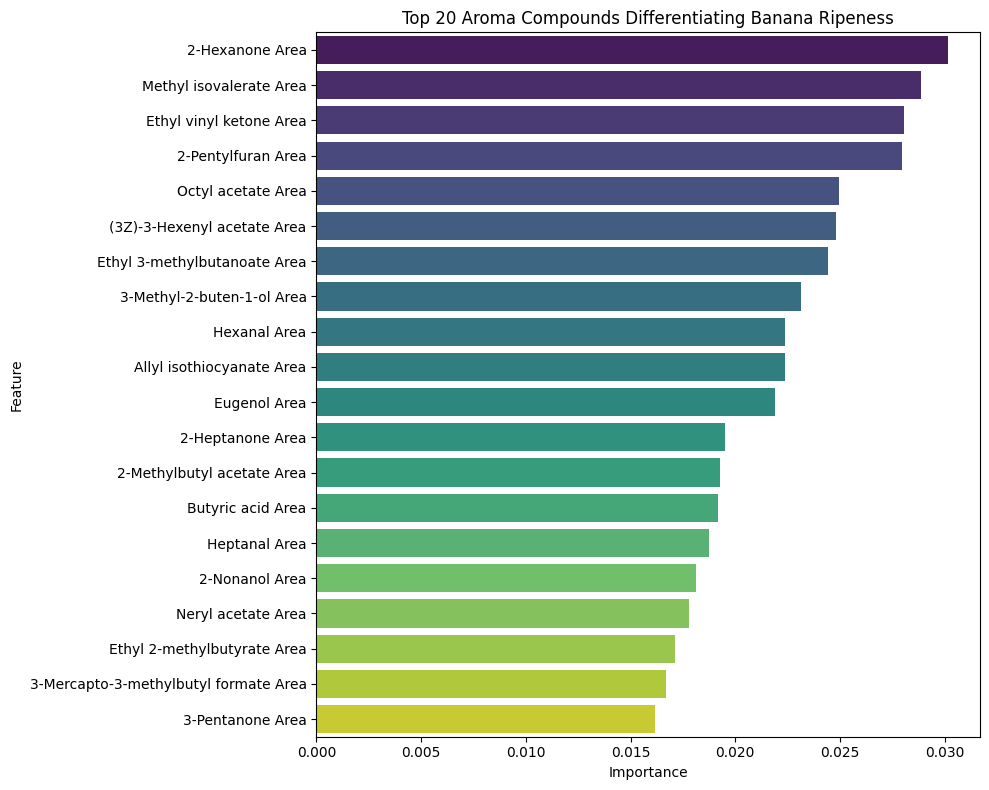

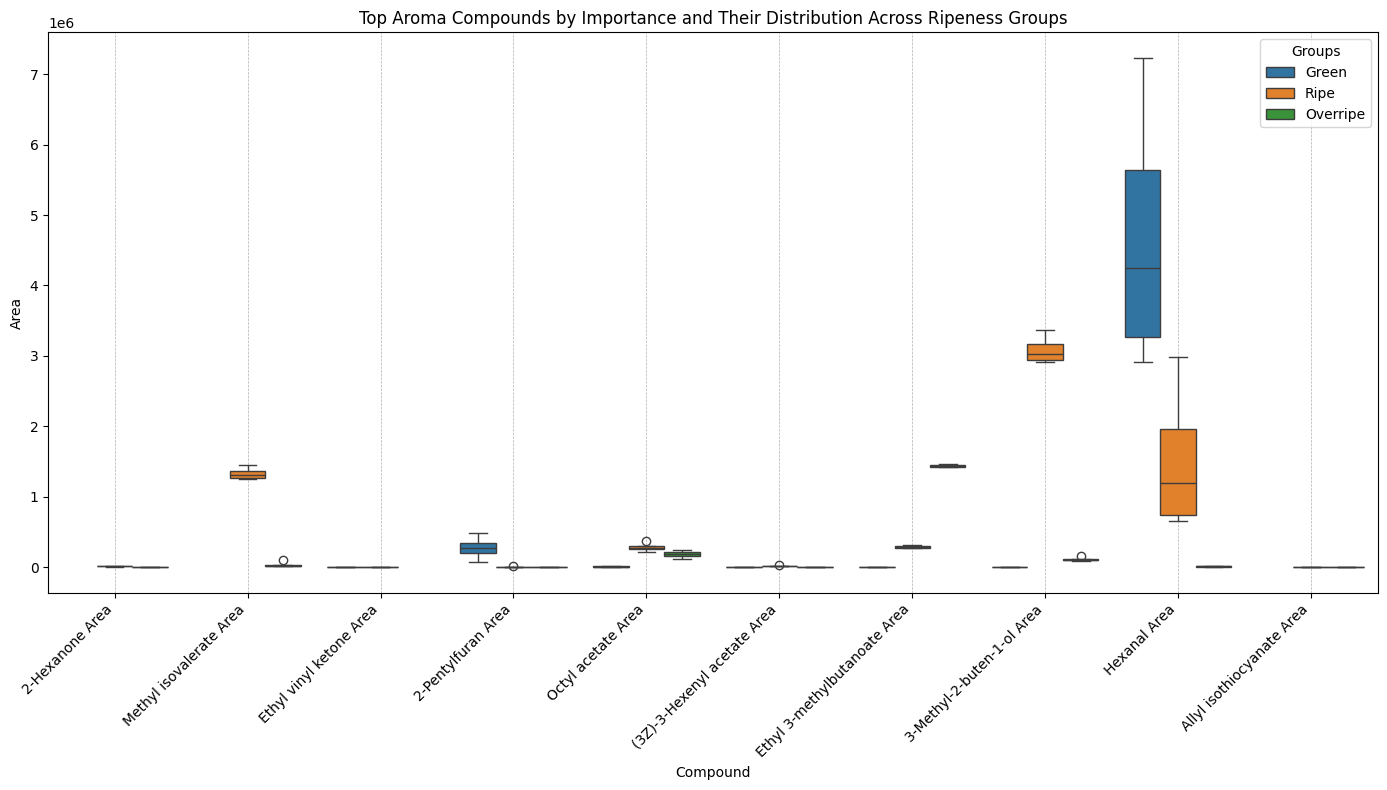

SHAP summary for class Green


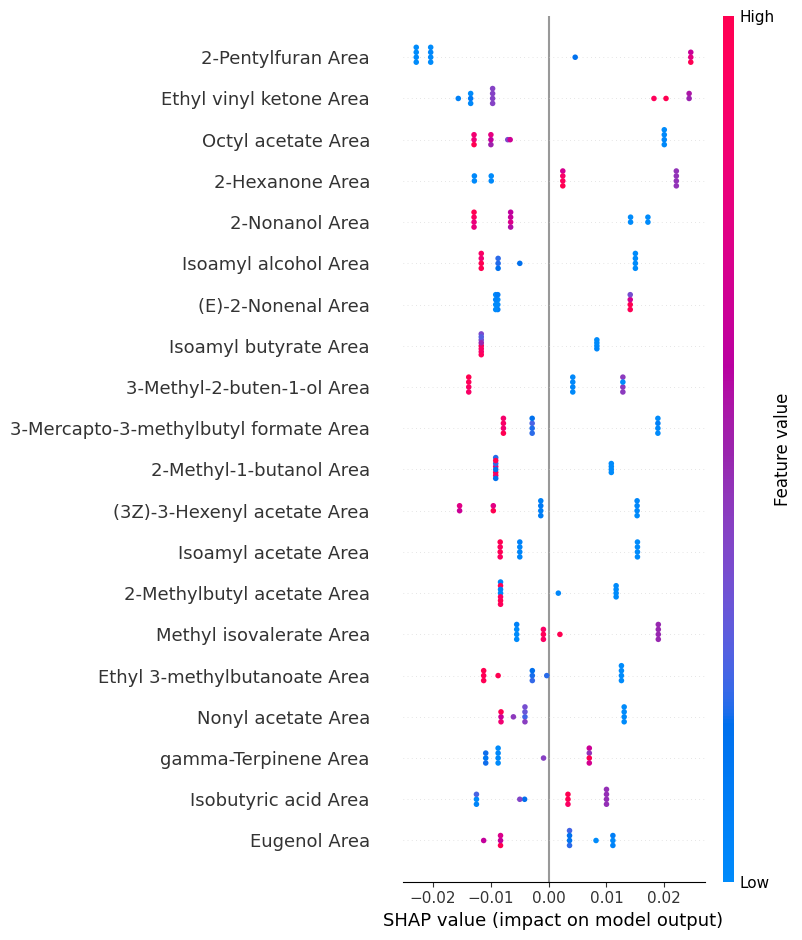

SHAP summary for class Overripe


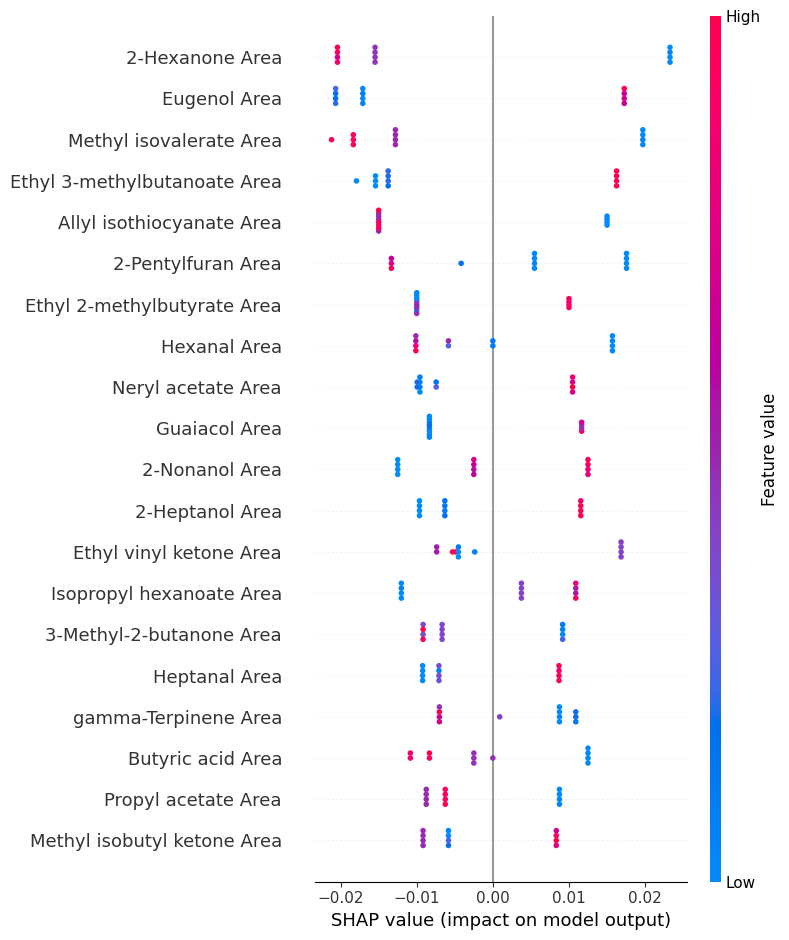

SHAP summary for class Ripe


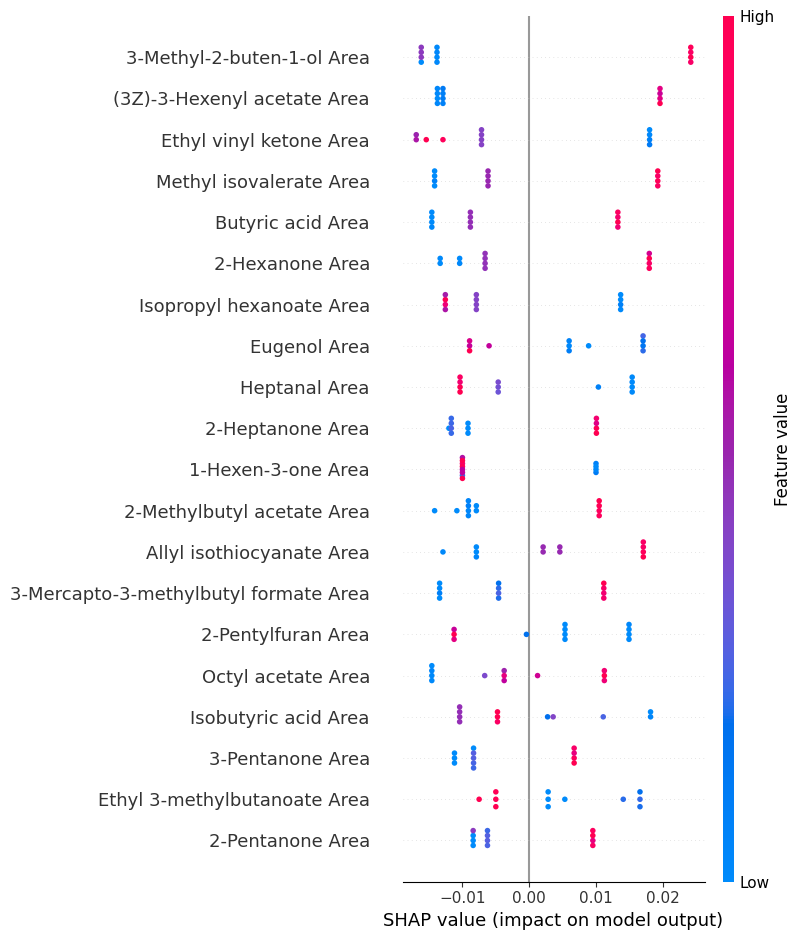

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
# Load the dataset
df = pd.read_csv("badata.csv")

# Drop the first unnamed column if it's an index or irrelevant
df = df.drop(columns=[df.columns[0]])
df = df.loc[:, df.isna().mean() <= 0.5]

# Separate features and target
target = df['Groups']
features = df.drop(columns=['Groups'])

# Encode the target labels
le = LabelEncoder()
y = le.fit_transform(target)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(features)

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
feature_names = features.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot top 20 important features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette='viridis')
plt.title('Top 20 Aroma Compounds Differentiating Banana Ripeness')
plt.tight_layout()
plt.savefig("top_aroma_markers.png")
plt.show()

# Select top 10 important features
top_features = importance_df.head(10)['Feature'].values

# Prepare data for visualization
df_top = df[['Groups'] + list(top_features)]
df_melted = df_top.melt(id_vars='Groups', var_name='Compound', value_name='Area')

# Plot the distribution of top features across banana ripeness groups
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_melted, x='Compound', y='Area', hue='Groups')
plt.xticks(rotation=45, ha='right')
plt.title('Top Aroma Compounds by Importance and Their Distribution Across Ripeness Groups')
plt.tight_layout()
plt.grid(axis='x', linestyle= '--', linewidth=0.5)
plt.savefig("top_compound_distributions.png")
plt.show()

explainer = shap.TreeExplainer(rf)

X_df = pd.DataFrame(X, columns=features.columns)

shap_values = explainer.shap_values(X)


# Summary plot for all classes
for class_idx, class_name in enumerate(le.classes_):
    print(f"SHAP summary for class {class_name}")
    # select shap values for that class (samples, features)
    shap_class = shap_values[:, :, class_idx]
    shap.summary_plot(shap_class, X_df)



In [6]:
print(y)

[0 2 1 0 2 1 2 0 1 0 1 2]


In [7]:
decoded = le.inverse_transform(y)
print(decoded)

['Green' 'Ripe' 'Overripe' 'Green' 'Ripe' 'Overripe' 'Ripe' 'Green'
 'Overripe' 'Green' 'Overripe' 'Ripe']


In [ ]:
print(rf.n_classes_)
X.shape

3


(12, 109)